## This part contains working with selenium, which requires using a browser you work with. I have been working with Safari, but in case you have another one, change it in the code, or specify the path. You may also be asked to allow remote automation for the code to run. I have written similar messages when the package is used, but it's better to be aware of these problems in advance.

In [ ]:
%pip install selenium

In [29]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
from PIL import Image  

In [1]:
weight = int(input('Enter your weight (in kg): ')) 

Enter your weight (in kg): 69


In [2]:
height = int(input('Enter your height (in cm): ')) 

Enter your height (in cm): 181


In [3]:
Gender = input('Enter your gender (male/female): ')

Enter your gender (male/female): male


In [4]:
age = int(input('Enter your age: ')) 

Enter your age: 19


In [5]:
Info = [height, weight, age, Gender]
Outcomes = ['Underweight', 'Healthy weight', 'Overweight', 'Obese']
BMI = round(weight / ((height / 100) ** 2), 1)
if Info[3] == 'female':
    url = 'https://www.calculator.net/calorie-calculator.html?csex=f'
else:
    url = 'https://www.calculator.net/calorie-calculator.html?csex=m'
if BMI < 18.5:
    State = 'Underweight'
elif BMI >= 18.5 and BMI <= 24.9:
    State = 'Healthy weight'
elif BMI >= 25 and BMI <= 29.9:
    State = 'Overweight'
else:
    State = 'Obese'
No = Outcomes.index(State)

In [12]:
# If you are using a browser other than Safari, change it in the next line
driver = webdriver.Safari()
driver.get('http://bmijs.is.tuebingen.mpg.de/body_masses/generate_bmi?utf8=✓&locale=en&body_mass%5Bunit_measurment%5D=M&body_mass%5Bgender%5D=' + Gender.capitalize() + '&body_mass%5Bage%5D=' + str(age) + '&body_mass%5Bheight%5D=' + str(height/100) + '&body_mass%5Bfeet%5D=&body_mass%5Binches%5D=&body_mass%5Bweight%5D=' + str(weight) + '&commit=Calculate+BMI')
time.sleep(7) # The page has some animation to load
driver.save_screenshot('body.png')
driver.quit()

Your BMI is 21.1
This is how your body is predicted to look like:


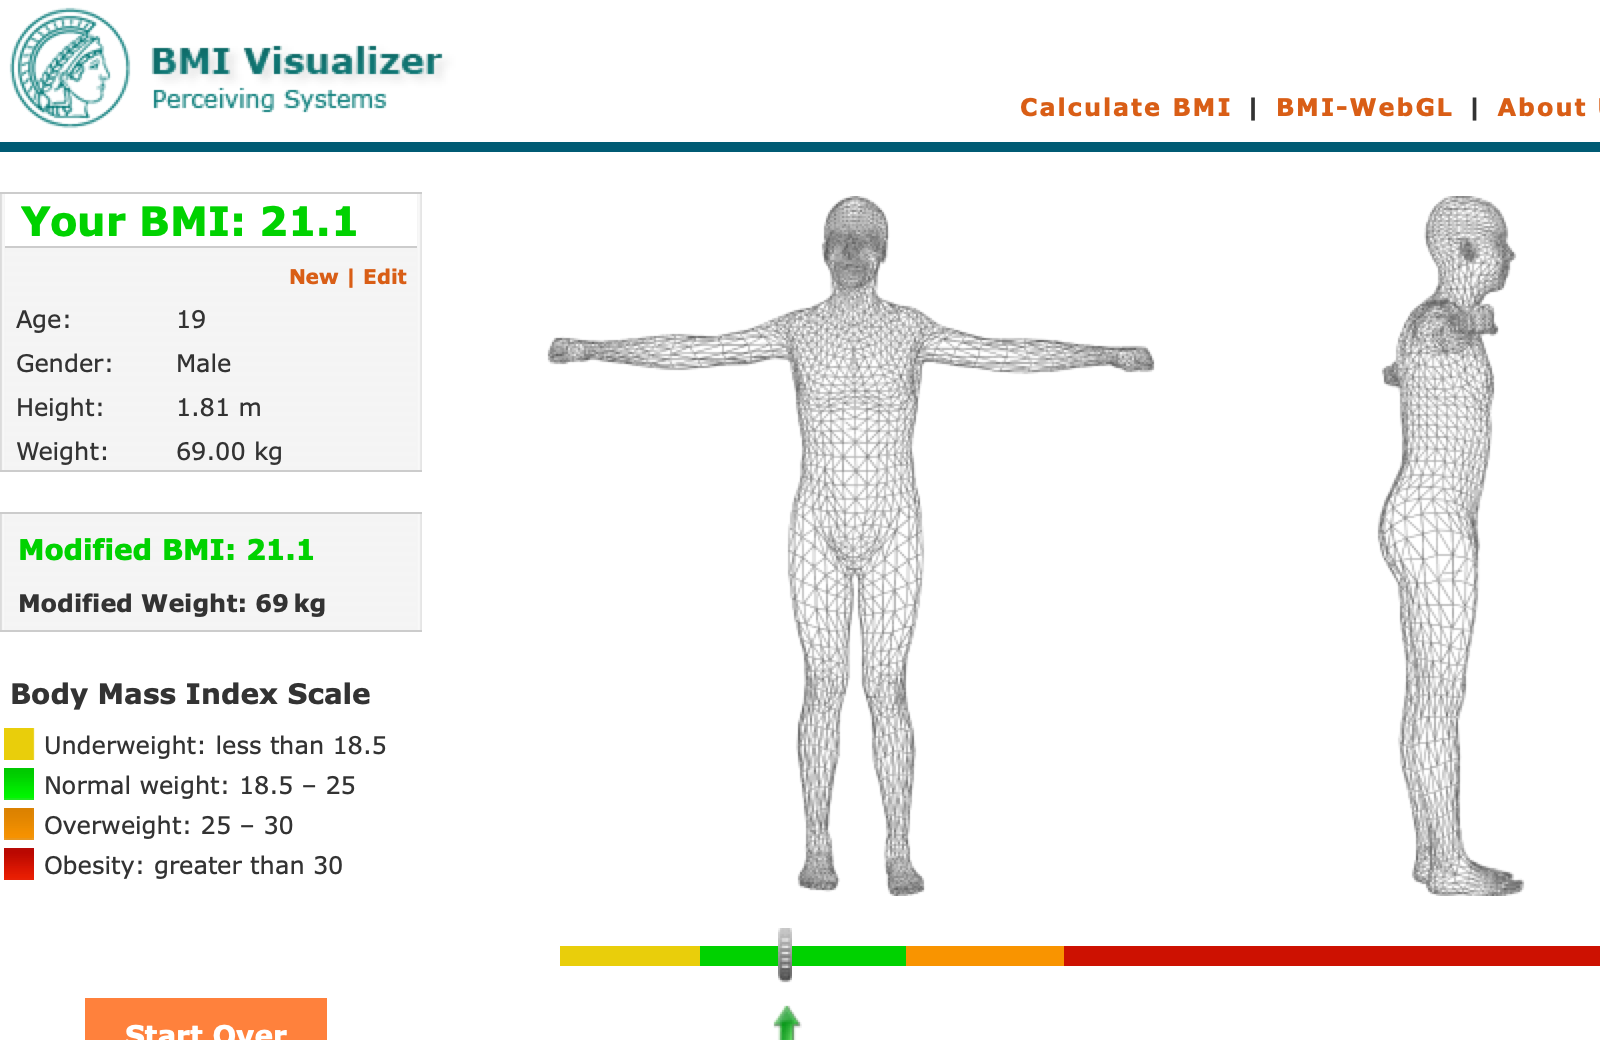

In [19]:
print('Your BMI is', BMI)
print('This is how your body is predicted to look like:')
Image.open('body.png')

In [21]:
if No == 0:
    print('You are', str.lower(State) + ". Let's work on gaining weight plans.")
elif No == 1:
    print('You are a', str.lower(State) + ". Let's work on maintaining weight plans.")
else:
    print('You are', str.lower(State) + ". Let's work on losing weight plans.")

You are a healthy weight. Let's work on maintaining weight plans.


In [25]:
# If you are using a browser other than Safari, change it in the next line
driver = webdriver.Safari()
driver.get(url)
element = driver.find_element_by_name('cheightmeter')
element.send_keys(str(Info[0]))
element = driver.find_element_by_name('cage')
element.send_keys(str(Info[2]))
element = driver.find_element_by_name('ckg')
element.send_keys(str(Info[1]) + Keys.RETURN)
try:
    elem = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "result_box")))
finally:
    content = driver.page_source
    driver.quit()

In [30]:
all_plans = BeautifulSoup(content).find_all('b')[0:7]
if No == 0:
    Calories = all_plans[5].text
elif No == 1:
    Calories = all_plans[0].text
elif No == 2:
    Calories = all_plans[1].text
else:
    Calories = all_plans[2].text

In [33]:
print('To achieve the set goal, you should consume', Calories, 'calories daily')

To achieve the set goal, you should consume 2,536 calories daily


### Please, remember this value. You will be asked to write it later
### 
### Now go back to the webpage